In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Step 1: Loading scikit learn version of Diabetes data set**

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

**Step 2: Splitting the data into train set and test set**

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(diabetes.data,diabetes.target, random_state = 2810)

**Step 3: Calculating train and test R-squared**

In [5]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.3784148518466054
0.32473224605708073


In [6]:
print(lasso.coef_)

[  0.          -0.         379.68939334   0.          -0.
  -0.          -0.           0.         327.62190038   0.        ]


In [7]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


**There are only two features and their names are 'bmi' and 's5' respectively**

**Step 4: Loading original diabetes dataset**

In [8]:
unscaled_diabetes = np.genfromtxt('/home/smith/Downloads/diabetes.data.txt', delimiter = '\t', skip_header=1)

**Step 5: Splitting the data into train set and test set**

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(unscaled_diabetes[:,0:10],unscaled_diabetes[:,10], random_state = 2810)

**Step 6: Calculating train and test R-squared on the original dataset**

In [11]:
lasso = Lasso()
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.5465817497702268
0.34893320451969656


In [12]:
print(lasso.coef_)

[ -0.15461892 -17.6414647    5.92685964   1.01361928   0.88882054
  -1.21840317  -1.91412247   0.          29.71657984   0.13966144]


**Using unscaled version only made one feature coefficient 0, namely 's4', whilst using the previous one had only 2 non-zero coefficient. Using Unscaled version has improved training R-squared over the previous one**

**Step 7: Preprocessing the data whilst avoiding Data Snooping**

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 8: Repeating step 3 for the current training and test data**

In [14]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
print(lasso.score(X_train_scaled,y_train))
print(lasso.score(X_test_scaled,y_test))

0.5520822070008307
0.38035967571695484


In [15]:
print(lasso.coef_)

[-0.98196941 -9.58825678 26.06991866 13.27148883 -9.45450112 -1.65713588
 -8.52796379  1.12336063 30.97938229  0.22772146]


**using scaled version causes all coefficient to be non-zero, which is different from previous 2 cases. The train and test R-squared has shown a minor improvement over unscaled test set.**

**The scaled version's results are closer to unscaled version rather than the scikit learn version due to the presence of data snooping in the scikit learn dataset.**

**Step 9: Plot the test R-squared vs the number of features used**

In [73]:
alphas = [0.1,0.3,0.5,0.8,1,2,3,5,10,15,20,25,30,35,40,45,50]
number_coeff = np.zeros(len(alphas))
r_test = np.zeros(len(alphas))

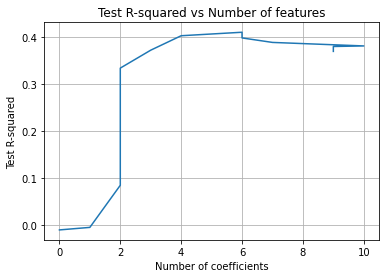

In [76]:
for i in range(len(alphas)):
    lasso1 = Lasso(alpha = alphas[i])
    lasso1.fit(X_train_scaled,y_train)
    r_test[i] = lasso1.score(X_test_scaled,y_test)
    number_coeff[i]= np.sum(lasso1.coef_!=0)
plt.plot(number_coeff,r_test)
plt.xlabel('Number of coefficients')
plt.ylabel('Test R-squared')
plt.title('Test R-squared vs Number of features')
plt.grid()

In [75]:
print(number_coeff)

[ 9.  9.  9.  9. 10.  7.  6.  6.  4.  3.  2.  2.  2.  2.  2.  1.  0.]


**I will choose the point at which number of coefficient is less and the test R-squared is high, which is at number_coeff =4. Doing this will also provide good interpretability**

**Step 10: Choose the regularization parameter for the Lasso using cross-validation on the training set.**

In [71]:
from sklearn.model_selection import cross_val_score
best_score = 0
for i in [0.1,0.3,0.5,0.8,1,1.5,2,2.53,5,10,15,20,25,30,35,40,45,50]:
    lasso2 = Lasso(alpha = i)
    scores = cross_val_score(lasso2, X_train_scaled , y_train, cv=5)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_alpha = i
lasso3 = Lasso(alpha = best_alpha)
lasso3.fit(X_train_scaled,y_train)
print(lasso3.score(X_train_scaled,y_train))
print(lasso3.score(X_test_scaled,y_test))

0.5473130230215644
0.3878215277221756


In [72]:
print(best_alpha)
print(best_score)
print(lasso3.coef_)

2
0.5213074363489202
[ -0.          -7.91682976  25.70172575  12.07068949  -0.54519149
  -7.38547924 -11.32659797   0.          27.21212986   0.        ]


**Step 11: Implement an inductive conformal predictor**

**(a)  Split the training set**

In [22]:
X_proper,X_cal,y_proper,y_cal = train_test_split(X_train,y_train,test_size = 99, random_state = 2810)

**(b) Preprocess the training set proper, calibration set, and test set**

In [23]:
scaler1 = StandardScaler()
scaler1.fit(X_proper)
X_proper_scaled = scaler1.transform(X_proper)
X_cal_scaled = scaler1.transform(X_cal)
X_tes_scaled = scaler1.transform(X_test)

**(c) Using the nonconformity measure α = |y − yˆ|**

In [57]:
lasso_c = Lasso(alpha = best_alpha)
lasso_c.fit(X_proper_scaled,y_proper)

Lasso(alpha=2)

In [58]:
y_pred_cal = lasso_c.predict(X_cal_scaled)

In [59]:
non_conf = abs(y_cal - y_pred_cal)

In [60]:
sorted_ncs = np.sort(non_conf)

In [61]:
#calculating for significance level 5%
e = 0.05
aug_len = len(y_cal)+1
k = np.ceil((1-e)*aug_len)

In [62]:
c1 = sorted_ncs[int(k)-1]

In [63]:
#calculating for significance level 20%
e = 0.2 
aug_len = len(y_cal)+1
k = np.ceil((1-e)*aug_len)
c2 = sorted_ncs[int(k)-1]

In [64]:
[c1, c2]

[101.42363667108293, 66.8295175812158]

In [65]:
y_pred_test = lasso_c.predict(X_tes_scaled)

In [66]:
pred_set_c1 = np.array([y_pred_test - c1, y_pred_test+c1]).T

In [67]:
pred_set_c2 = np.array([y_pred_test - c2, y_pred_test+c2]).T

In [68]:
#test error rate for 20% significance level
print(np.mean((y_test >= pred_set_c2[:,0])&(pred_set_c2[:,1]>=y_test)))

0.7027027027027027


In [69]:
#test error rate for 5% significance level
print(np.mean((y_test >= pred_set_c1[:,0])&(pred_set_c1[:,1]>=y_test)))

0.9009009009009009


In [70]:
print(c1-c2)
#Prediction interval

34.594119089867135


**Step 12:Results**

(a) The training R-squared is 0.3784148518466054
      
   The test R-squared is 0.32473224605708073
   
   Number of Featured used = 2

(b) The training R-squared is 0.5465817497702268
      
   The test R-squared is 0.34893320451969656
   
   Number of Featured used = 9

(c) The training R-squared is 0.5520822070008307
  
   The test R-squared is 0.38035967571695484
   
   Number of Featured used = 10

(d) The training R-squared is 0.5473130230215644

The test R-squared is 0.3878215277221756

Number of Featured used = 7 

Best chosen Alpha = 2


(e) Length of prediction intervals =  34.594119089867135

   Test- error rate for 5% significance level = 0.9009009009009009
   
   Test- error rate for 20% significance level = 0.7027027027027027


**1) Interesting observation about Lasso: In our dataset, the number of coefficients made zero by Lasso is highly dependent on the random state of the split. Lasso seems to be very sensitive to Data Snooping**

**2) Tie-breaking: We could add a tie-breaking random variable in our calculations to take ties into the account.**

**3) Validity of Conformal predictors can be tested by using Cross-validation**